# Springboard Data Science Boot Camp - Data Storytelling Project: Adult Income

## Objectives:

- Briefly explore the data and perform what cleaning is necessary.
    - look for NaN, Datatypes, and drop/impute data as seems pertinent
- More thoroughly explore the data and formulate a story around it.
    - histograms
    - barcharts
    - heatmaps
    - boxplots
    - scatterplots
    - pairplot
    - etc.
    - Question the data:
        - Can I count something interesting?
        - Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
        - Can I make a bar plot or a histogram?
        - Can I compare two related quantities?
        - Can I make a scatterplot?
        - Can I make a time-series plot?
        - Looking at the plots, what are some insights I can make?
        - Can I see any correlations?
        - Is there a hypothesis I can - and should - investigate further?
        - What other questions are the insights leading me to ask?
- Present the data for a non-technical audience.
    - Select what charts best explain the data story and make them as professionally presentable (As clear as possible)
    - ensure that each graphic flows naturally within in the story and is clear enough such that anyone could understand it.
    - ensure rubric standards and project objectives are met prior to submission.

### 1. Import modules and data and briefly explore/clean it ###

In [134]:
# Import python modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Add more modules here as necessary
from plotly import graph_objects as go


In [135]:
# Import the data
df = pd.read_csv('./Data/adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [137]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


__Initial Impressions:__
- There are no NaN values!
- however some columns require clarification: "fnlwgt", "educational-num", "capital-gain", "capital-loss", "income"
    - **fnlwgt** is the final weight assigned by a machine learning algorithm and perhaps should be dropped for our purposes
    - **educational-num** is the number of years of education (not necessarily the highest degree of education achieved)
    - **capital-gain/loss** are measure of gain or loss of capital. I assume this means investments in the stock market.
    - **income** is the assumed earned income as calculated by a Machine learning model and only indicates above or belo 50k.
        - Since it's not very clear, this column too should likely be dropped for our purposes. however it would be interesting to see how a machine learning model might predict these values.

Before exploring much further I will drop the **fnlwgt, capital-gain, and capital-loss** columns since the majority of data appears to be filled with 0's (in the capital-gain/loss columns) to account for a lack of data to that end and while it could be a strong indicator of ones' income, there's just not enough data provided there to justify it's use in our exploration.  as for fnlwgt this is a pre-assigned weight which I'm not sure whether I agree with it or not and it is a sum calcuation by some other entities work and so is not a core piece of data. 

In [138]:
# drop the "fnlwgt", "capital-gain", "capital-loss" columns from df
df.drop(columns=["fnlwgt", "capital-gain", "capital-loss"], inplace=True)
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


There **?** in the workclass and occupation columns.  I assume this to mean that the entity represented in the data doesn't have work at that point in time.  If we were pursuing data involving employment rates, this would be a value worth retaining in the dataset as it stands after validating whether or not the ? means what I think it means, these rows should be dropped.

In [139]:
# find all rows which contain a ? in either the workclass or the occupation columns
df[df['workclass'] == "?"]

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K
6,29,?,HS-grad,9,Never-married,?,Unmarried,Black,Male,40,United-States,<=50K
13,58,?,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,35,United-States,<=50K
22,72,?,7th-8th,4,Divorced,?,Not-in-family,White,Female,6,United-States,<=50K
35,65,?,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,55,United-States,>50K
48812,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,99,United-States,<=50K
48820,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,10,United-States,>50K
48822,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,32,United-States,<=50K


In [140]:
df[df['occupation'] == "?"]

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K
6,29,?,HS-grad,9,Never-married,?,Unmarried,Black,Male,40,United-States,<=50K
13,58,?,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,35,United-States,<=50K
22,72,?,7th-8th,4,Divorced,?,Not-in-family,White,Female,6,United-States,<=50K
35,65,?,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,55,United-States,>50K
48812,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,99,United-States,<=50K
48820,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,10,United-States,>50K
48822,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,32,United-States,<=50K


After taking a look at specifically the **?** values in workcalss and occupation columns, It is clear that this also represents unprovided information. so rather than dropping it I will simply replace the '?' with the mean value(s) of their respective columns

In [141]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [142]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [143]:
# replace '?' with 'not-available'
# convert all '?' to NaN in 'occupation' column and replace '?' with 'Private' in 'workclass' column
df['workclass'].replace('?', 'Private', inplace=True)
df['occupation'].replace('?', np.NaN, inplace=True)

# proportionally fill NaN in 'occupation with 'Prof-specialty', 'Craft-repair', 'Exec-managerial'
df['occupation'] = df['occupation'].fillna(pd.Series(np.random.choice(['Prof-specialty', 'Craft-repair', 'Exec-managerial'], 
                                                      p=[.335, .335, .33], size=len(df))))

In [144]:
df['workclass'].value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [145]:
df['occupation'].value_counts()

Prof-specialty       7127
Craft-repair         7065
Exec-managerial      6987
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [146]:
# Let's also do a value counts in the categorical columns: 'workclass', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender' & 'native-country'
# so as to determine whether it would be worth it to convert these categorical not object columns in the dataframe and to see if it would be worth it to visualize these into barcharts.
cols_list = ['workclass', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

for col in cols_list:
    print("==:==:==:==:==:==:==:==:==:==:==:==")
    print(df[col].value_counts())

==:==:==:==:==:==:==:==:==:==:==:==
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
==:==:==:==:==:==:==:==:==:==:==:==
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64
==:==:==:==:==:==:==:==:==:==:==:==
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64
==:==:==:==:==:==:==:==:==:==:==:==
Married-

In [147]:
# We discovered a '?' in the native-country column! we should replace that with the overwhelming majority of 'United-States'
df['native-country'].replace('?', 'United-States', inplace=True)

Based upon what was found, 'native-country', would likely be too large to visualize but still would be insightful to the income of individuals. Enough data cleaning let's explore the data more visually!

### 2. Explore the data and formulate a story around it. ###

In [148]:
# let's print the head of 'df' so as to have a full list of data to work with
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,30,United-States,<=50K


In [149]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

Let's create a pair of sub dataframes from the main set which one which contains only the above 50k and the other below.

In [150]:
df_above50k = df[df['income'] == '>50K']

pd.DataFrame(df_above50k)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,>50K
10,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
14,48,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,48,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48820,71,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,10,United-States,>50K
48826,39,Local-gov,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,20,United-States,>50K
48835,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K


In [151]:
df_below50k = df[df['income'] == '<=50K']

pd.DataFrame(df_below50k)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,30,United-States,<=50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K
6,29,Private,HS-grad,9,Never-married,Craft-repair,Unmarried,Black,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48834,32,Private,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,11,Taiwan,<=50K
48836,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


First I'd like to take take a look a what the ratio of men to women in the full sample set and then I'd like to see if that ratio is consistent within the above and below 50k subsets.

In [152]:
print("----------Full Data Set-----------")
print(df['gender'].value_counts(normalize=True))
print("----------------------------------\n")
print("--------Above 50k Data Set--------")
print(df_above50k['gender'].value_counts(normalize=True))
print("----------------------------------\n")
print("--------Below 50k Data Set--------")
print(df_below50k['gender'].value_counts(normalize=True))
print("----------------------------------")

----------Full Data Set-----------
Male      0.668482
Female    0.331518
Name: gender, dtype: float64
----------------------------------

--------Above 50k Data Set--------
Male      0.848635
Female    0.151365
Name: gender, dtype: float64
----------------------------------

--------Below 50k Data Set--------
Male      0.611815
Female    0.388185
Name: gender, dtype: float64
----------------------------------


We have a 2 to 1 ratio between men and women which would mean, assuming no other factors are at play, we should see approximately the same ratio between the above/below 50k subsets.  Unfortunately this isn't what we see.  In the above 50k data set we see the men go from 67% to 85%, A 27% increase!  we likewise see the expected drop in women from 33% to 15% which for women is a 55% drop in this data set!  However it is necessary to put this into perspective. We are in this instance treating our full sample set as a whole population.  An absurd assertion as we know there isn't world population of 48,842 people, but since we are exploring the ratio of men to women in this specific data set, due to the 2 to 1 ratio of men to women in the set, any motion in either direction is going reflect more greatly in the ratio of women, as one might guess at approx twice as much, so it stands to reason a 27% increase in men will naturally result in a 55% decrease in women as 27 X 2 is 54, very close to 55!

Continuing on to the Below 50k data set, we see 67% drop to 61% in the men, and an increase from 33% to 39% in women; a 9% decrease in men and an %18 increase in women.

This quick look is indicative that generally men tend to earn above 50k then women do in this dataset, the reasons of which we hope to explore further.

Let's now examine the life choices which are availabel to us in this dataset, first examining education, a commonly cited factor in individual income statistics.

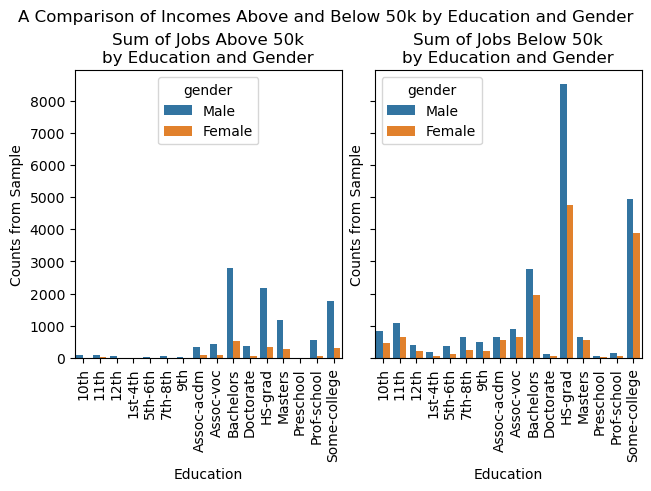

In [153]:
fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout=True, sharey=True)
fig.suptitle('A Comparison of Incomes Above and Below 50k by Education and Gender')


sns.barplot(data=pd.DataFrame(df_above50k.groupby('education')[['gender', 'education']].value_counts()).reset_index(), 
            x='education', 
            y=0, 
            hue='gender',
            errorbar=('ci', False),
            ax=ax1)
ax1.set_title('Sum of Jobs Above 50k\nby Education and Gender')
ax1.set_xlabel('Education')
ax1.set_ylabel('Counts from Sample')
ax1.tick_params(axis='x', labelrotation=90)

sns.barplot(data=pd.DataFrame(df_below50k.groupby('education')[['gender', 'education']].value_counts()).reset_index(), 
            x='education', 
            y=0, 
            hue='gender',
            errorbar=('ci', False),
            ax=ax2)
ax2.set_title('Sum of Jobs Below 50k\nby Education and Gender')
ax2.set_xlabel('Education')
ax2.set_ylabel('Counts from Sample')
ax2.tick_params(axis='x', labelrotation=90)

plt.show()

So this is an interesting result. We aren't surprised so to see the greater ratio of men to women from  our previous analysis, but what we see here, is massive popuation difference between those who earn above 50k and those who do not. let's to a quick bar chart showing the difference between the two income ranges specifically.

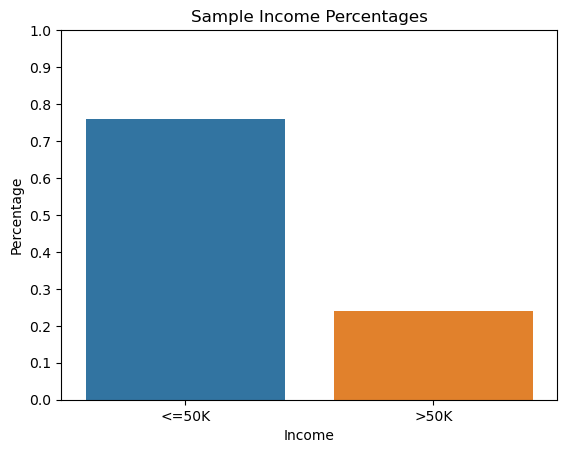

In [154]:
ax = sns.barplot(pd.DataFrame(df['income'].value_counts(normalize=True)).reset_index(),
            x='index', 
            y='income',
            errorbar=('ci', False))
plt.ylabel('Percentage')
plt.xlabel('Income')
plt.title('Sample Income Percentages')
ax.set_yticks(np.arange(0.0, 1.1, 0.1))
plt.show()

Unfortunately, the overwelming majority of people are earning below 50K, by approximately 3 to 1. Given the disparate degree between incomes I would like to look at the odds that ones' education will take them from below 50k to above.

In [155]:
# Subset the main data set into two Male and Female subsets.
df_male_subset = df[df['gender'] == 'Male']
df_female_subset = df[df['gender'] == 'Female']

In [156]:
def order(df, key='income', values=['<=50K', '>50K']):
    df1 = df[df[key] == values[1]]
    df2 = df[df[key] == values[0]]
    df = pd.concat([df1.sort_values(0), df2.sort_values(0, ascending=False)], ignore_index=True).reset_index()
    return df

In [157]:
df_male_normalized = pd.DataFrame(df_male_subset.groupby('education')[['income', 'gender', 'education']].value_counts(normalize=True)).reset_index()
df_female_normalized = pd.DataFrame(df_female_subset.groupby('education')[['gender', 'education', 'income']].value_counts(normalize=True)).reset_index()



In [158]:
# Due to the normalization the df_female_normalized dropped the two 0.0 proportions for '1st-4th' & 'Preschool'
# education values and we need to put them back.
pre_first_fourth = pd.DataFrame({'education': ['Preschool', '1st-4th'],
                    'gender': ['Female', 'Female'],
                    'income': ['>50K', '>50K'],
                    0: [0.000000, 0.000000]})

df_female_normalized = pd.concat([df_female_normalized, pre_first_fourth], ignore_index=True)

df_female_normalized.reset_index(inplace=True)

In [159]:
df_female_normalized.drop(columns=['index'])

,education,gender,income,0
0,10th,Female,<=50K,0.991247
1,10th,Female,>50K,0.008753
2,11th,Female,<=50K,0.983077
3,11th,Female,>50K,0.016923
4,12th,Female,<=50K,0.981043
5,12th,Female,>50K,0.018957
6,1st-4th,Female,<=50K,1.000000
7,5th-6th,Female,<=50K,0.968504
8,5th-6th,Female,>50K,0.031496
9,7th-8th,Female,<=50K,0.995816


In [160]:
df_male_normalized = order(df_male_normalized)#.set_index('education')

In [161]:
df_female_normalized = order(df_female_normalized)#.set_index('education')

In [162]:
fig = go.Figure(
    data=[
        go.Bar(
            name="Male Income Over 50K",
            x=df_male_normalized["education"],
            y=df_male_normalized[df_male_normalized['income'] == '>50K'][0],
            offsetgroup=0,
        ),
        go.Bar(
            name="Male Income At or Under 50K",
            x=df_male_normalized["education"],
            y=df_male_normalized[df_male_normalized['income'] == '<=50K'][0],
            offsetgroup=0,
            base=df_male_normalized[df_male_normalized['income'] == '>50K'][0]
        ),
        go.Bar(
            name="Female Income Over 50K",
            x=df_female_normalized["education"],
            y=df_female_normalized[df_female_normalized['income'] == '>50K'][0],
            offsetgroup=1,
        ),
        go.Bar(
            name="Female Income At or Under 50K",
            x=df_female_normalized["education"],
            y=df_female_normalized[df_female_normalized['income'] == '<=50K'][0],
            offsetgroup=1,
            base=df_female_normalized[df_female_normalized['income'] == '>50K'][0],
        )
    ],
    layout=go.Layout(
        title="Percent Success Rate by Education",
        yaxis_title="%"
    )
)
fig.show()


So something very interesting to note: taking a naive, face-value approach to education, your odds of earning over 50K is still very low. Even if you earn your Bachelor's degree, at best your odds are approximately 50/50.  However, for Men at least, Master's degrees, you finally get a break of increased chances for earning over 50K, going from approx, 2:1 odds at Master's, and then 3:1 for Doctorate, and Professional school, with Professional School, interestingly enough, getting a slightly better chance of achieving that higher income with approx. 5:1 odds.  Maybe that Doctoral degree isn't all it's cracked up to be, especially when taking into account the plausible cost!

For women however it's a different story,  There best odds are only favorable for success for the Doctoral degree with a little over 1:1 odds and the close second but a little under favorable odds is the Professional School.

Why is that?  my best guess is that the majority of women choose to get married or otherwise provided for and so perhaps they generally just don't become high earners.  to investigate that We are going to do the same thing we just did but this time we are going view through the lense of 'relationship'

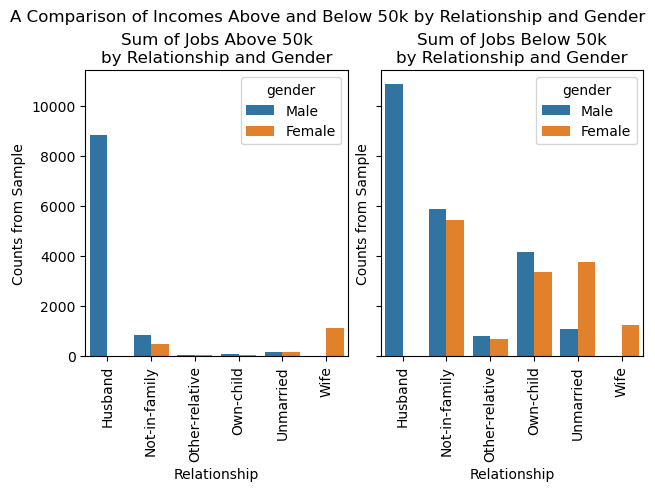

In [163]:
fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout=True, sharey=True)
fig.suptitle('A Comparison of Incomes Above and Below 50k by Relationship and Gender')


sns.barplot(data=pd.DataFrame(df_above50k.groupby('relationship')[['gender', 'relationship']].value_counts()).reset_index(), 
            x='relationship', 
            y=0, 
            hue='gender',
            errorbar=('ci', False),
            ax=ax1)
ax1.set_title('Sum of Jobs Above 50k\nby Relationship and Gender')
ax1.set_xlabel('Relationship')
ax1.set_ylabel('Counts from Sample')
ax1.tick_params(axis='x', labelrotation=90)

sns.barplot(data=pd.DataFrame(df_below50k.groupby('relationship')[['gender', 'relationship']].value_counts()).reset_index(), 
            x='relationship', 
            y=0, 
            hue='gender',
            errorbar=('ci', False),
            ax=ax2)
ax2.set_title('Sum of Jobs Below 50k\nby Relationship and Gender')
ax2.set_xlabel('Relationship')
ax2.set_ylabel('Counts from Sample')
ax2.tick_params(axis='x', labelrotation=90)

plt.show()

Wow! what an upset.  The lionshare of relationships fall under husband, but interestingly enough, when it comes to the women,  the majority are either not-in-family, own-child, or unmarried category,  However, the majority of women who are earning above 50K are in fact Married. now whether that is their own income or they are counting the income of their spouse it isn't clear in this dataset and, to my knowledge, neither was that specified when this data was collected.

In [164]:
df_male_normalized = pd.DataFrame(df_male_subset.groupby('relationship')[['income', 'gender', 'relationship']].value_counts(normalize=True)).reset_index()
df_female_normalized = pd.DataFrame(df_female_subset.groupby('relationship')[['income', 'gender', 'relationship']].value_counts(normalize=True)).reset_index()

In [165]:
df_male_normalized

,relationship,income,gender,0
0,Husband,<=50K,Male,0.551306
1,Husband,>50K,Male,0.448694
2,Not-in-family,<=50K,Male,0.876955
3,Not-in-family,>50K,Male,0.123045
4,Other-relative,<=50K,Male,0.965728
5,Other-relative,>50K,Male,0.034272
6,Own-child,<=50K,Male,0.983353
7,Own-child,>50K,Male,0.016647
8,Unmarried,<=50K,Male,0.877193
9,Unmarried,>50K,Male,0.122807


In [166]:
# Due to the normalization the df_female_normalized dropped the two 0.0 proportions for 'Husband' in
# relationship values and we need to put it back.
Husband = pd.DataFrame({'relationship': ['Husband'],
                    'gender': ['Female'],
                    'income': ['>50K'],
                    0: [0.000000]})

df_female_normalized = pd.concat([df_female_normalized, Husband], ignore_index=True)

df_female_normalized.reset_index(inplace=True)

In [167]:
df_female_normalized.drop(columns=['index'])

,relationship,income,gender,0
0,Husband,<=50K,Female,1.000000
1,Not-in-family,<=50K,Female,0.923339
2,Not-in-family,>50K,Female,0.076661
3,Other-relative,<=50K,Female,0.965167
4,Other-relative,>50K,Female,0.034833
5,Own-child,<=50K,Female,0.987855
6,Own-child,>50K,Female,0.012145
7,Unmarried,<=50K,Female,0.958758
8,Unmarried,>50K,Female,0.041242
9,Wife,<=50K,Female,0.530928


In [168]:
df_male_normalized = order(df_male_normalized)
df_female_normalized = order(df_female_normalized)

In [169]:
fig = go.Figure(
    data=[
        go.Bar(
            name="Male Income Over 50K",
            x=df_male_normalized["relationship"],
            y=df_male_normalized[df_male_normalized['income'] == '>50K'][0],
            offsetgroup=0,
        ),
        go.Bar(
            name="Male Income At or Under 50K",
            x=df_male_normalized["relationship"],
            y=df_male_normalized[df_male_normalized['income'] == '<=50K'][0],
            offsetgroup=0,
            base=df_male_normalized[df_male_normalized['income'] == '>50K'][0]
        ),
        go.Bar(
            name="Female Income Over 50K",
            x=df_female_normalized["relationship"],
            y=df_female_normalized[df_female_normalized['income'] == '>50K'][0],
            offsetgroup=1,
        ),
        go.Bar(
            name="Female Income At or Under 50K",
            x=df_female_normalized["relationship"],
            y=df_female_normalized[df_female_normalized['income'] == '<=50K'][0],
            offsetgroup=1,
            base=df_female_normalized[df_female_normalized['income'] == '>50K'][0],
        )
    ],
    layout=go.Layout(
        title="Percent Success Rate by Relationship",
        yaxis_title="%"
    )
)
fig.show()

Nothing much pops out from this other than that the closer one approaches marital bliss, ones' odds begins to improve in respect to earning above that 50K mark. Amusingly we also have some Men identifying as wives, even though in our previous graphic there is clearly only women registered as wives. I will have to investigate further how that occurred.

Meanwhile, let's take a break from bar charts and take a look at the histogram of the age column.

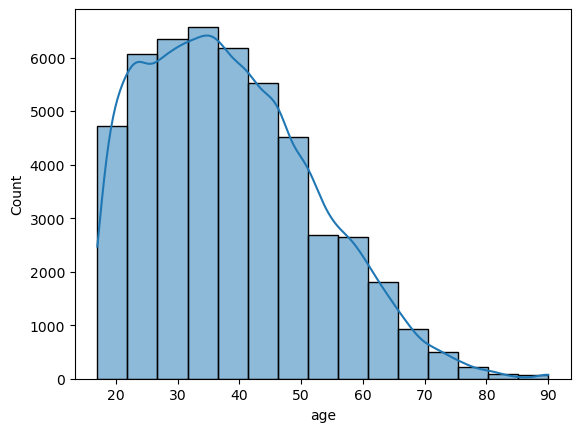

In [170]:
ax = sns.histplot(data=df['age'], bins=15, kde=True)

So this is a relatively expected shape. The majority of individuals falls between roughly 20 to 50 years in age, and then begins to steeply decline as people retire from the work force. what would be interesting to see is if the majority of people whose age is above 50 are earning less the 50K per annum as the cost of living requires them to continue in the workforce.

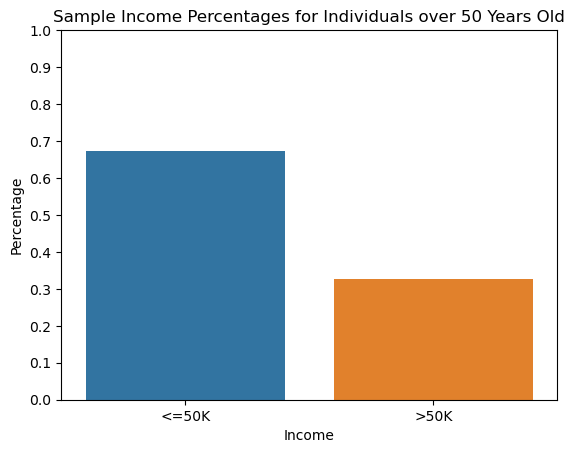

In [171]:
ax = sns.barplot(pd.DataFrame(df[df['age'] >= 50]['income'].value_counts(normalize=True)).reset_index(),
            x='index', 
            y='income',
            errorbar=('ci', False))
plt.ylabel('Percentage')
plt.xlabel('Income')
plt.title('Sample Income Percentages for Individuals over 50 Years Old')
ax.set_yticks(np.arange(0.0, 1.1, 0.1))
plt.show()

Only a 2:1 ratio.  Seniors generally prefer to work I guess.

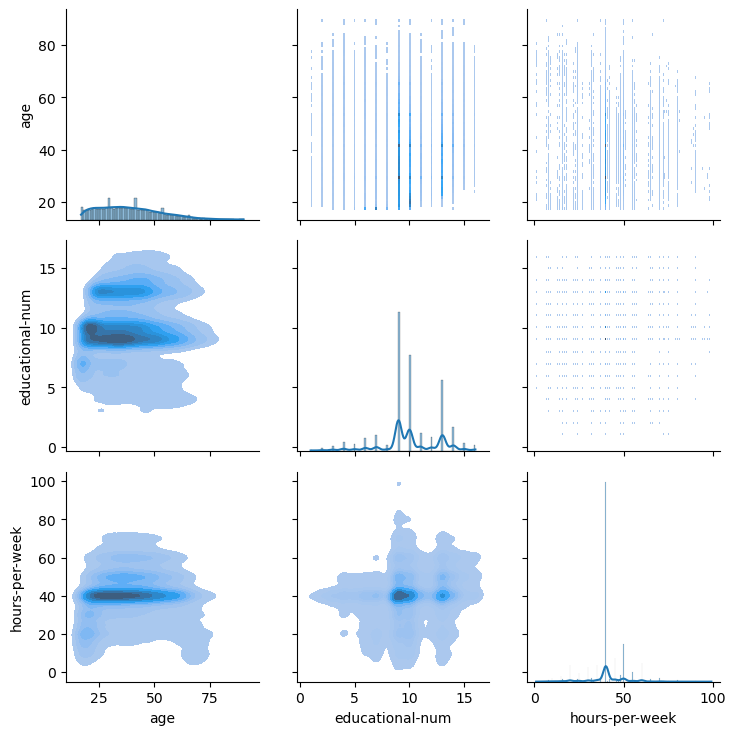

In [172]:
g = sns.PairGrid(df[['age', 'educational-num', 'hours-per-week']])
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

In this Diagram there are a couple of things to note, although perhaps not altogether surprising:  First off, the vast majority of employees education sits at approx.  10 years of education with a second concentration of individuals setting at about 13 years of education.  And the overwhelming majority of employees is at 40 hours a week; this holds irrespective of education, or age.

This information however leads to the question, which spectrum do these people fall under? are the majority of people working more than 40 hours week earning more than 50K a year? we've already established that the majority of people with higher degrees are earning more than 50K per year albeit not by very much.

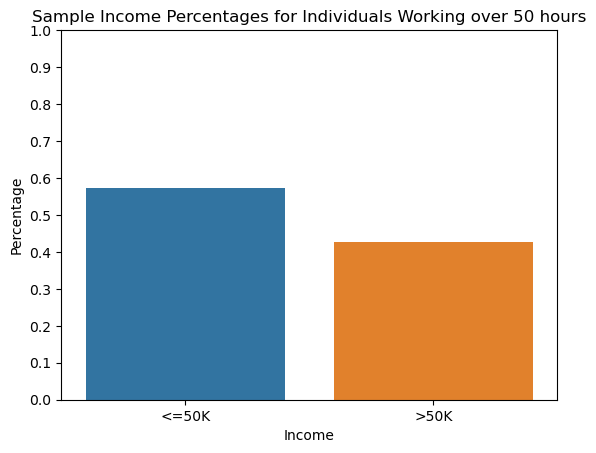

In [173]:
ax = sns.barplot(pd.DataFrame(df[df['hours-per-week'] >= 50]['income'].value_counts(normalize=True)).reset_index(),
            x='index', 
            y='income',
            errorbar=('ci', False))
plt.ylabel('Percentage')
plt.xlabel('Income')
plt.title('Sample Income Percentages for Individuals Working over 50 hours')
ax.set_yticks(np.arange(0.0, 1.1, 0.1))
plt.show()

Well, looks like if you're willing to sell your soul to the man your odds of earning above 50K go up.  However let's not forget, we wanted to see how much this affected in come in Gender.

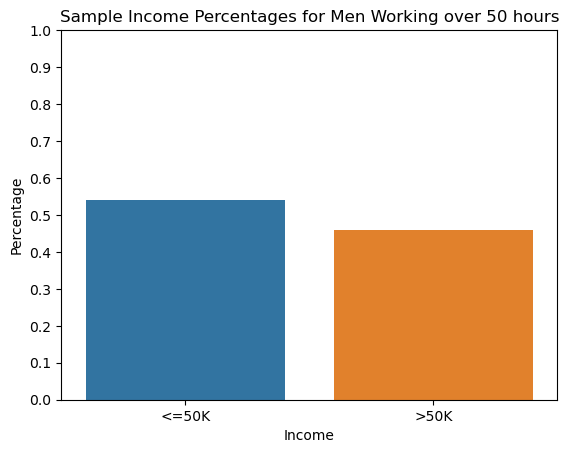

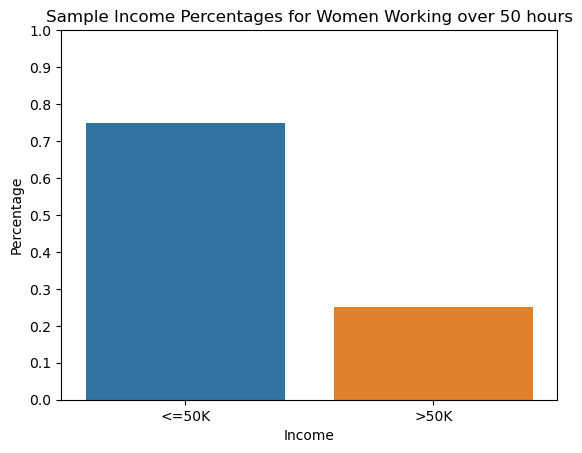

In [174]:
ax = sns.barplot(pd.DataFrame(df[(df['hours-per-week'] >= 50) & (df['gender'] == 'Male')][['income', 'gender']].value_counts(normalize=True)).reset_index(),
            x='income', 
            y=0,
            errorbar=('ci', False))
plt.ylabel('Percentage')
plt.xlabel('Income')
plt.title('Sample Income Percentages for Men Working over 50 hours')
ax.set_yticks(np.arange(0.0, 1.1, 0.1))
plt.show()

ax = sns.barplot(pd.DataFrame(df[(df['hours-per-week'] >= 50) & (df['gender'] == 'Female')][['income', 'gender']].value_counts(normalize=True)).reset_index(),
            x='income', 
            y=0,
            errorbar=('ci', False))
plt.ylabel('Percentage')
plt.xlabel('Income')
plt.title('Sample Income Percentages for Women Working over 50 hours')
ax.set_yticks(np.arange(0.0, 1.1, 0.1))
plt.show()

Men's odds are greatly benefitted in working extra hours past 40 increasing odds to nearly a 1:1 relationship.  However Women still lag behind with an 3:1 chance that they will be earnin under 50K.

Next on the list is career choice data to see if womens career choices is what leads to this disparate degree of income.

In [199]:
df_male_subset = df[df['gender'] == 'Male']
df_female_subset = df[df['gender'] == 'Female']

df_male_normalized = pd.DataFrame(df_male_subset.groupby('occupation')[['occupation', 'income', 'gender']].value_counts(normalize=True)).reset_index()
df_female_normalized = pd.DataFrame(df_female_subset.groupby('occupation')[['occupation', 'income', 'gender']].value_counts(normalize=True)).reset_index()

In [200]:
df_male_normalized = pd.concat([df_male_normalized, pd.DataFrame({'occupation':['Priv-house-serv'],
                                                          'income':['>50K'],
                                                          'gender':['Male'],
                                                          0:[0.000000]})], ignore_index=True)

In [201]:
df_male_normalized = order(df_male_normalized)
df_female_normalized = order(df_female_normalized)

In [202]:
df_male_normalized

,index,occupation,income,gender,0
0,0,Priv-house-serv,>50K,Male,0.000000
1,1,Other-service,>50K,Male,0.056629
2,2,Handlers-cleaners,>50K,Male,0.071507
3,3,Farming-fishing,>50K,Male,0.121864
4,4,Machine-op-inspct,>50K,Male,0.155095
5,5,Transport-moving,>50K,Male,0.210054
6,6,Craft-repair,>50K,Male,0.224025
7,7,Adm-clerical,>50K,Male,0.249186
8,8,Armed-Forces,>50K,Male,0.333333
9,9,Protective-serv,>50K,Male,0.340302


In [203]:
fig = go.Figure(
    data=[
        go.Bar(
            name="Male Income Over 50K",
            x=df_male_normalized["occupation"],
            y=df_male_normalized[df_male_normalized['income'] == '>50K'][0],
            offsetgroup=0,
        ),
        go.Bar(
            name="Male Income At or Under 50K",
            x=df_male_normalized["occupation"],
            y=df_male_normalized[df_male_normalized['income'] == '<=50K'][0],
            offsetgroup=0,
            base=df_male_normalized[df_male_normalized['income'] == '>50K'][0]
        ),
        go.Bar(
            name="Female Income Over 50K",
            x=df_female_normalized["occupation"],
            y=df_female_normalized[df_female_normalized['income'] == '>50K'][0],
            offsetgroup=1,
        ),
        go.Bar(
            name="Female Income At or Under 50K",
            x=df_female_normalized["occupation"],
            y=df_female_normalized[df_female_normalized['income'] == '<=50K'][0],
            offsetgroup=1,
            base=df_female_normalized[df_female_normalized['income'] == '>50K'][0],
        )
    ],
    layout=go.Layout(
        title="Percent Success Rate by Occupation",
        yaxis_title="%"
    )
)
fig.show()

The occupation doesn't seem to have as much of an effect as I would have thought.  I could Imagine being an executive/manager or a specialized professional would increase the odds of making top dollar but having only an approx 1:1 ratio for both of them seems to me to be odd.  And women still appear to be heavily disadvantaged. with a reason becoming less and less clear with every visualization.

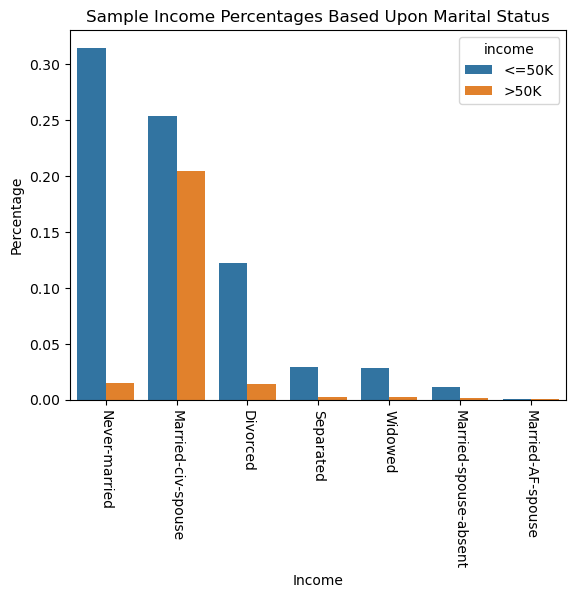

In [217]:
ax = sns.barplot(data=pd.DataFrame(df[['marital-status', 'income']].value_counts(normalize=True)).reset_index(),
                 x='marital-status',
                 y=0,
                 hue='income',
                 errorbar=('ci', False))
plt.ylabel('Percentage')
plt.xlabel('Income')
plt.xticks(rotation=270)
plt.title('Sample Income Percentages Based Upon Marital Status')
plt.show()

Well this is interesting.  This first one where we have a clear winner for success.  Marriage has a substantially greater chance for increasing income over 50K than any combination of the other marital-status'!

For the sake of brevity I haven't included any visualization that factor in race however that very well could be feature, particularly by its included cultural features.

However, rather than lamenting what data features I wished I had I will explain what is happening here.

The greatest factors in succeeding in life, with success defined as earning above 50K annually,  Are first: education, second: marital-status, and third: occupation.  If I were to model a predictive model, I would also include factors such as gender, and race.

It is disconcerting to see how, in the case of this analysis, women seem to be aversely affected. Though these factors improve women's chances for success, it isn't near to the degree as it is for men.  I find this disturbing particularly since in the United States, where the majority of this data derives, it is flagrantly illegal to pay someone less based upon their gender, yet with this data set that seems to be the case.

However, if this were objectively true, then businesses would only hire women for the sake of being able to get away with paying a lower wage/salary range.  Also if this were objectively true then all women employees should start suing for better pay.

This leads me to believe that there is likely another factor at play which isn't present in this dataset.  I would like to take a regionalized approach, I would like to get sample data by state in the US, an not only select census income data but also where legally possible to do so I would pull information from employers on a state by state basis, and perform this analysis again to see if I see the same disparate data; If so, with the more refined features available: demographical, economical, financial and company benefits info, I would be able to make a more accurate analysis and ascertain what is the underlying cause of this apparent pay gap.